In [1]:
import cv2,os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
%matplotlib inline

In [27]:
cv2.__version__

'3.3.1'

# Image Basics

Images are stored as matrices using NumPy arrays. 

Below an image is loaded from the file system and loaded into memory. This matrix is m x n x c which represents the number of rows x number of columns x number of colour channels (RGB/BGR).


In [2]:
image_path = os.path.join('images')

### Reading and displaying an image

In [3]:
img = cv2.imread(os.path.join(image_path,'dog.jpg'))
logo = cv2.imread(os.path.join(image_path,'opencv.png'))

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
logo_rgb = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

The below commented code is generally used for displaying images/videos in opencv. It opens a separate window for the image and waits for a key press. In the rest of the notebook, matplotlib imshow will be used for inline image displaying.

In [5]:
# cv2.imshow('dog', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Note: When images are loaded in OpenCV, they return BGR (blue, green, red) channels. Matplotlib/keras has an RGB representation, so converting from BGR to RGB is necessary when working with multiple libraries.

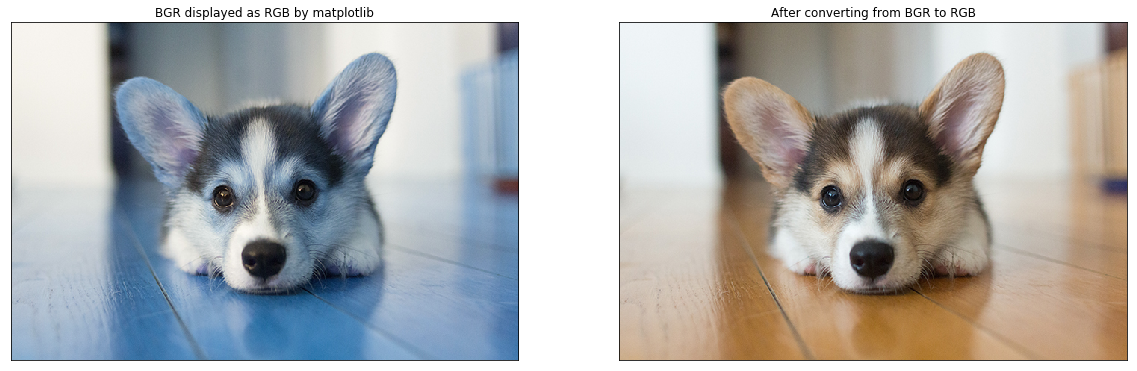

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title('BGR displayed as RGB by matplotlib'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_rgb)
plt.title('After converting from BGR to RGB'), plt.xticks([]), plt.yticks([])
plt.show()

### Channels of an image

As can be seen in below images, the 3 channels are split. In blue channel, pixels having blue color have a 255 value, which corresponds to white and hence that part is not visible. The same pixels have no red and green color, hance these 2 channels have a 0 value (black color).

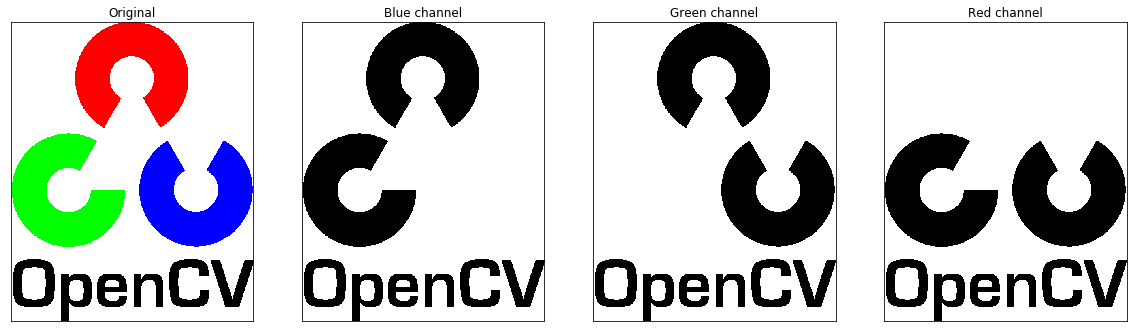

In [7]:
b,g,r = cv2.split(logo)

b = logo[:,:,0]
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(logo_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(b, cmap="gray")
plt.title('Blue channel'), plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(g, cmap="gray")
plt.title('Green channel'), plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(r, cmap="gray")
plt.title('Red channel'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.destroyAllWindows()

### Accessing pixels

Pixels can be accessed by row and column numbers, they can also be modified in the same way

In [8]:
#BGR values of pixel at (150,150)
pixel = img[150,150] 
print(pixel)

[49 57 80]


(Text(0.5,1,'Accessing pixels (Black square)'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

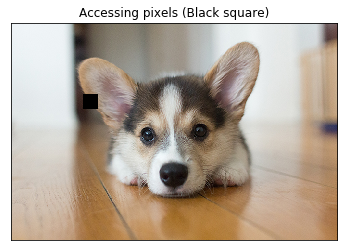

In [9]:
#Using numpy indexing to access multiple pixels
im1 = img_rgb.copy()
im1[150:180,150:180] = [0,0,0] 
plt.imshow(im1)
plt.title('Accessing pixels (Black square)'), plt.xticks([]), plt.yticks([])

### Image ROI (Region of interest)

Sometimes, we are not interested in processing the entire image. Instead, we have a particular part of the image which needs to be processed further. Example, a single face in the image. This is the Region Of Interest and it is obtained using numpy indexing

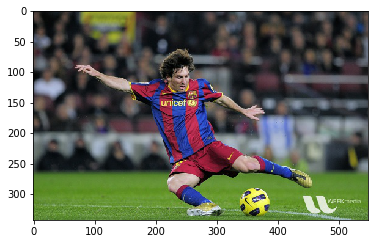

In [10]:
messi = cv2.imread(os.path.join(image_path,'messi.jpg'))
messi_rgb = cv2.cvtColor(messi,cv2.COLOR_BGR2RGB)
ball = messi_rgb[280:340, 330:390]
plt.imshow(messi_rgb)


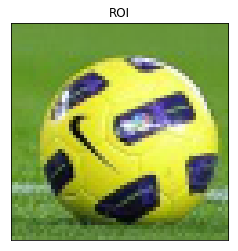

In [11]:
plt.imshow(ball)
plt.title('ROI'), plt.xticks([]), plt.yticks([])
messi2 = messi_rgb.copy()
messi2[273:333, 100:160] = ball

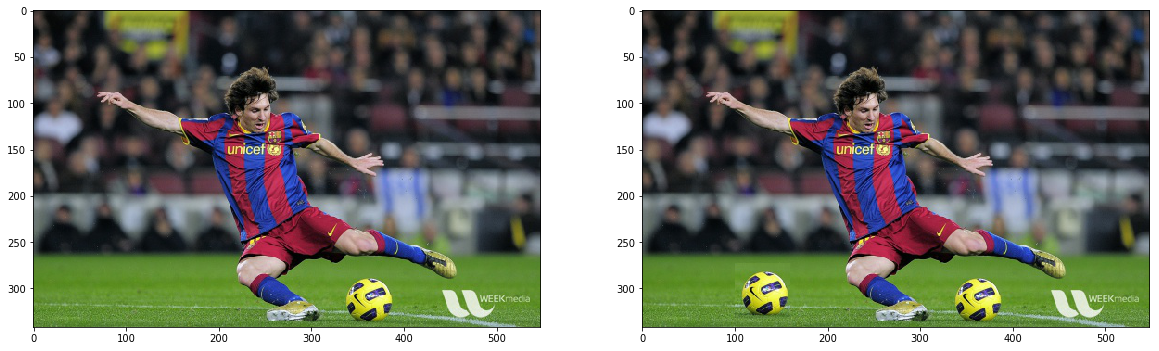

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(messi_rgb)

plt.subplot(122)
plt.imshow(messi2)
plt.show()

## Changing colorspaces

We can change colorspaces using cv2.cvtColor. Most commonly used conversions are BGR to Gray and BGR to HSV. HSV colorspace is useful in specifying color ranges, which can be used to do color-based object tracking/filtering.

We usually convert any image to grayscale and perform processing on the grayscale image to reduce number of computations.

(Text(0.5,1,'Grayscale'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

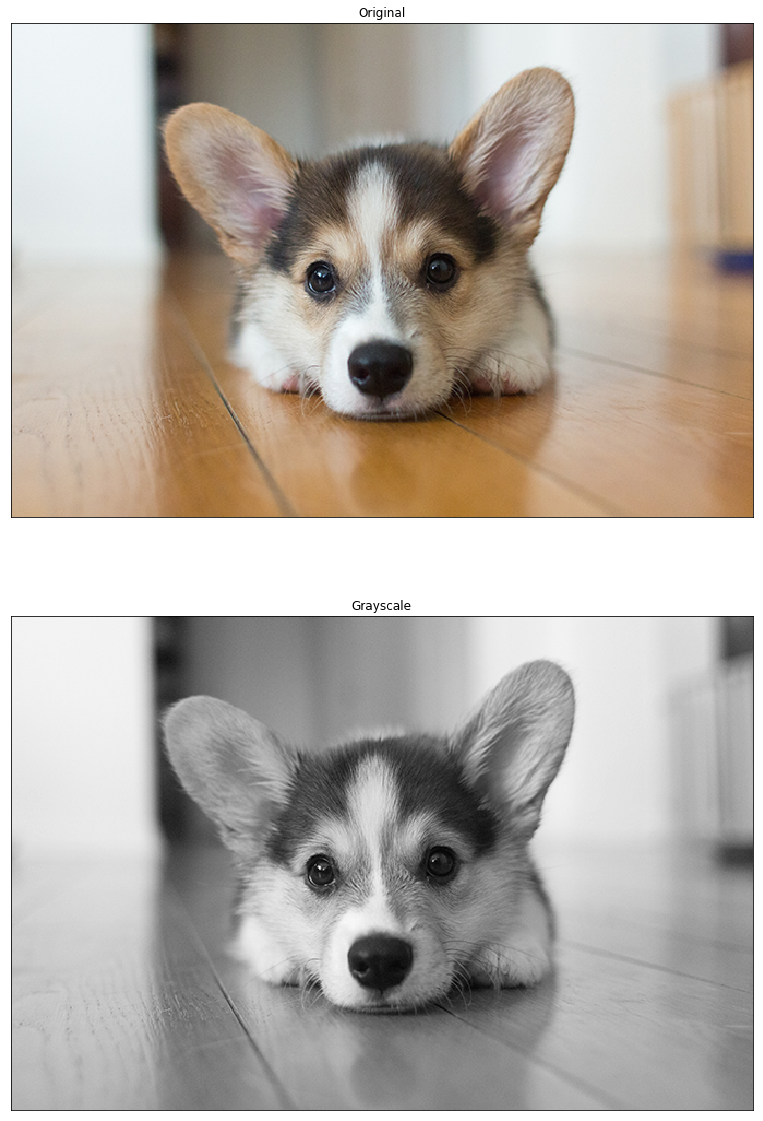

In [13]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(img_gray, cmap = "gray")
plt.title('Grayscale'), plt.xticks([]), plt.yticks([])



# cv2.imshow('hsv', img_hsv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Color based object detection and Masking

Color based object detection can be easily done using the HSV colorspace and inRange Masking. A mask is a binary image which has only 2 possible pixel values, 0 (black) and 255(white). 

A mask is usually used with "bitwise_and", so that only the parts of the image that correspond to the white (255) pixels are retained, and the ones corresponding to the black (0) pixels are discarded.

We can specify the HSV range lower and upper bounds used for generating the mask in the cv2.inRange function

(Text(0.5,1,'Final'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

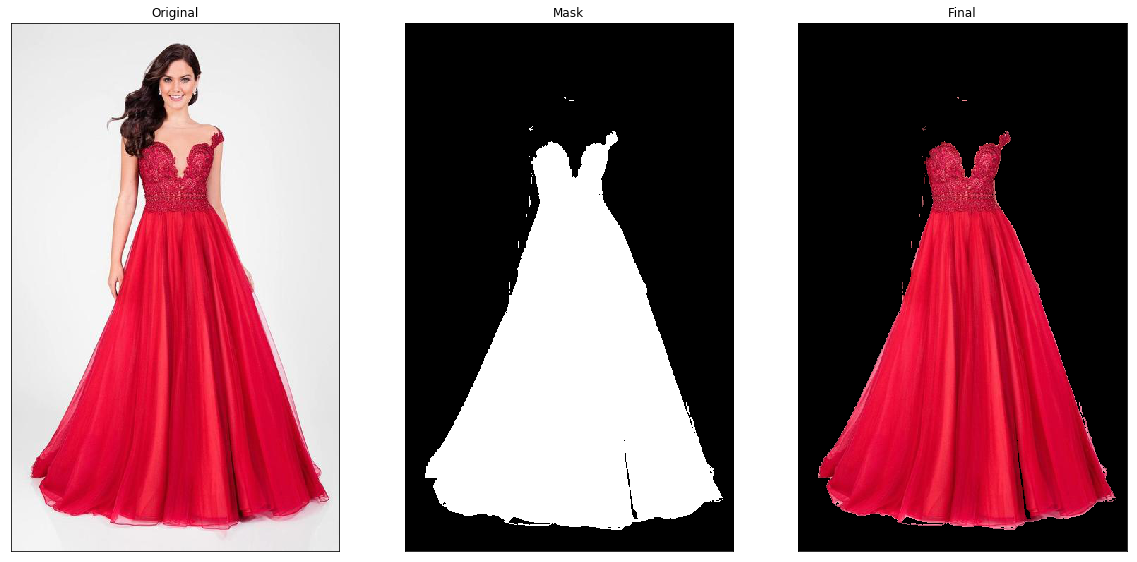

In [14]:
img = cv2.imread(os.path.join(image_path,'red.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#Specify HSV boundaries
lower_red = np.array([155,100,100])
upper_red = np.array([195,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img_rgb,img_rgb, mask= mask)

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.imshow(mask, cmap = "gray")
plt.subplot(133)
plt.imshow(res)
plt.title('Final'), plt.xticks([]), plt.yticks([])



Note: If you want to detect objects with different colors like blue, red etc, you can generate individual masks for each color and "bitwise_or" these masks to get a final mask. This ORed mask can then be used to detect the required colors.



#### Finding HSV values

To easily find the HSV value for a particular BGR combination, following trick can be used. Convert the required BGR color to HSV using cvtColor:

In [15]:
bgr_color = [77,41,255]
color = np.uint8([[bgr_color]])
hsv_color = cv2.cvtColor(color,cv2.COLOR_BGR2HSV)
print(hsv_color)

[[[175 214 255]]]


Now, take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.

## Image Thresholding


Thresholding is done to binarize an image. The difference between a grayscale and binary image is that in grayscale, every pixel can take any of the 256 values from 0-255. In a binary image, each pixel can take only 2 values, 0 or 255.

One of the important applications of this is masking. This is also useful for segmentation. This operation is applied to each pixel, if the pixel value is more than threshold, the specified value is given to it and if it is less than the threshold, pixel is set to zero.

For this, the image should be grayscale. 

OpenCV provides various ways of thresholding. The maxValue that should be given to the pixels above threshold value is specified as a parameter.


### Adaptive Thresholding

Simple thresholding uses a global threshold. This is inefficient when we have lighting changes. For this purpose, it is better to use adaptive thresholding. Adaptive thresholding calculates local threshold for different regions. The region size is provided as the argument, block size. 

There are 2 types of methods for calculating the threshold, ADAPTIVE_THRESH_MEAN_C which takes the mean of pixels in the block and ADAPTIVE_THRESH_GAUSSIAN_C, which takes the gaussian weighted mean of the pixels in the block.

(Text(0.5,1,'Adaptive thresholding'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

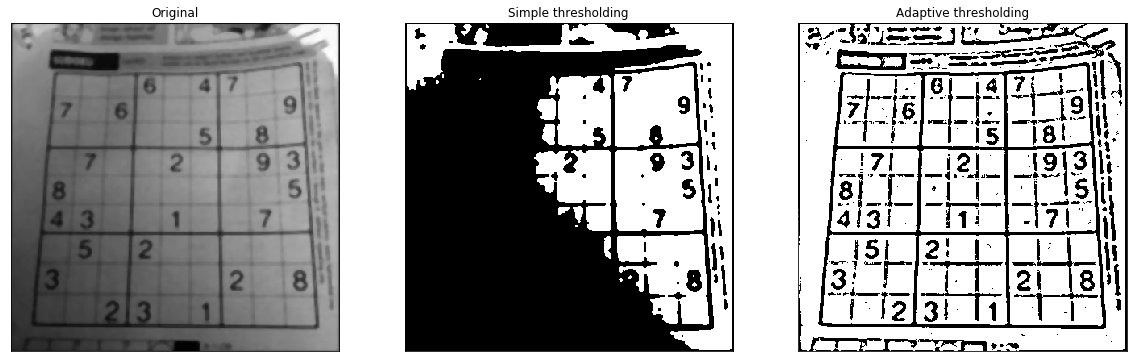

In [16]:
img = cv2.imread(os.path.join(image_path,'sudoku.png'),0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img, cmap = "gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(th1, cmap = "gray")
plt.title('Simple thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(th, cmap="gray")
plt.title('Adaptive thresholding'), plt.xticks([]), plt.yticks([])

## Smoothing images 

Smoothing is used to reduce noise and produce a less pixelated image. It also helps to get rid of unnecessary extra information. Smoothing/blurring is the most common preprocessing step for any operation. 

This makes use of some kind of pixel neighborhood averaging. The size of the neighborhood to be considered depends on the kernel size being used. The mean filter gives equal weight to every neighborhood pixel. Gaussian filtering uses a gaussian filter, with the highest weight given to the center pixel. Median filter selects the median value of the neighborhood as the new value for the pixel.

Generally, the Gaussian filter is used for normal blurring. If the noise is salt-and-pepper noise, then median filter is preferred.

### Gaussian Blurring

Gaussian blurring also performs weighted averaging, and the weights are derived from a gaussian distribution with standard deviation 1. 

Gaussian Kernel example:

![Gaussian kernel](images/gauss_kernel.gif)

(Text(0.5,1,'Gaussian blurred image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

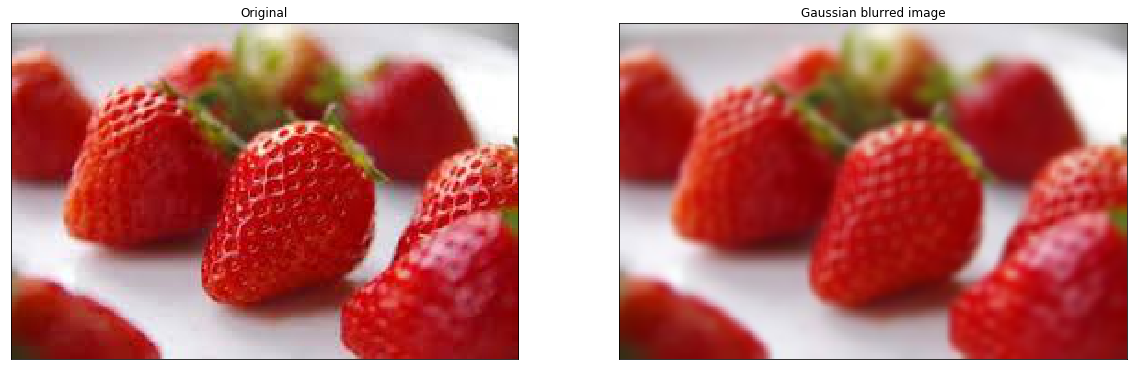

In [17]:
strawberry = cv2.imread(os.path.join(image_path,'strawberry.jpg'))
strawberry = cv2.cvtColor(strawberry, cv2.COLOR_BGR2RGB)
blur_img = strawberry.copy()

blur_img = cv2.GaussianBlur(blur_img, (5, 5), 10)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(strawberry)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(blur_img)
plt.title('Gaussian blurred image'), plt.xticks([]), plt.yticks([])

### Median Blurring

Median blur is very effective at removing salt-and-pepper noise in images. It replaces the pixel with the median of the neighborhood pixel values. Again, the neighborhood depends on the kernel size.

(Text(0.5,1,'Median blurred image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

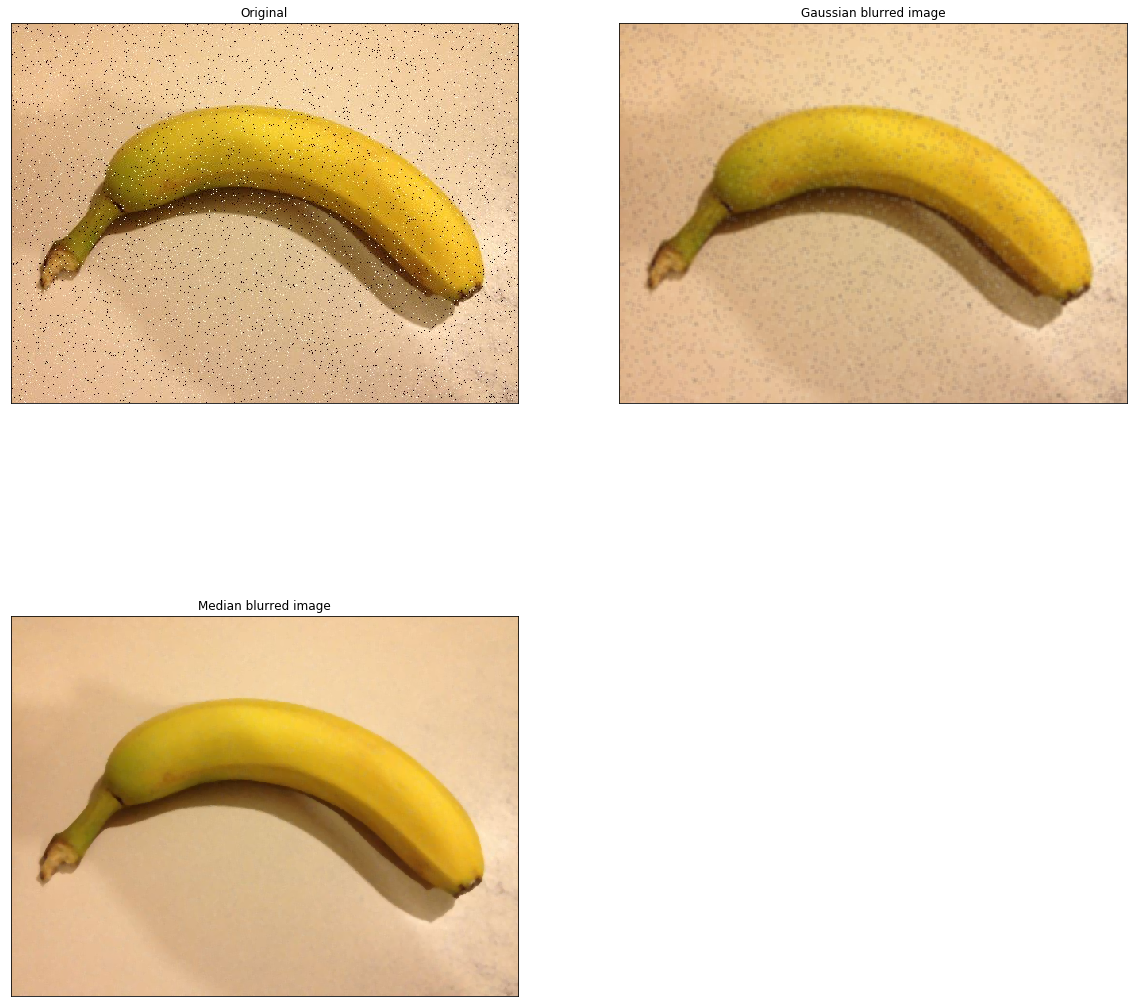

In [18]:
img = cv2.imread(os.path.join(image_path,'saltbanana.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_img = img.copy()
g_blur = cv2.GaussianBlur(blur_img, (5, 5), 10)
blur_img = cv2.medianBlur(blur_img,5)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(g_blur)
plt.title('Gaussian blurred image'), plt.xticks([]), plt.yticks([])
plt.subplot(223)
plt.imshow(blur_img)
plt.title('Median blurred image'), plt.xticks([]), plt.yticks([])



## Image Gradients

Detecting edges is one of the fundamental image operations. It helps to get rid of extra data and still maintain the structure of the image. This uses the concept of image gradients. A high gradient value indicates presence of an edge, as there is a significant change in pixel intensities. 

Sobel and Laplacian edge detectors use convolution with kernels as an approximation. Sobel has 2 kernels, horizontal and vertical, whereas Laplacian has only 1 kernel.

Kernels:

        SobelX           SobelY          Laplacian

        +1  0  -1       +1  +2  +1        0  -1  0

        +2  0  -2        0   0   0       -1  4  -1

        +1  0  -1       -1  -2  -1        0  -1  0

### Sobel and Laplacian

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

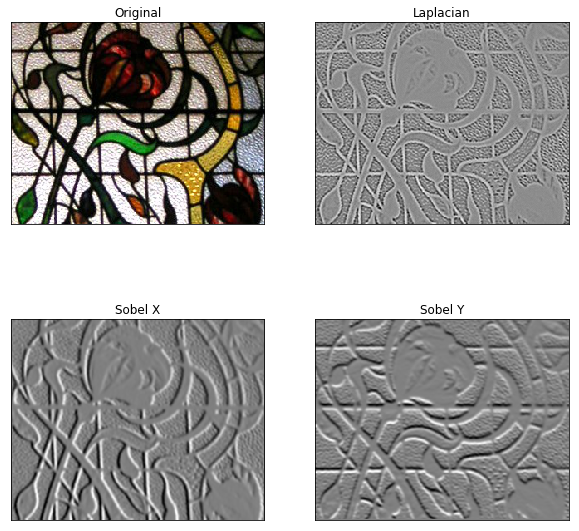

In [19]:
or_img = cv2.imread(os.path.join(image_path,'window.jpg'))
img_rgb = cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB)
# converting to gray scale
gray = cv2.cvtColor(or_img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

### Canny edge detection


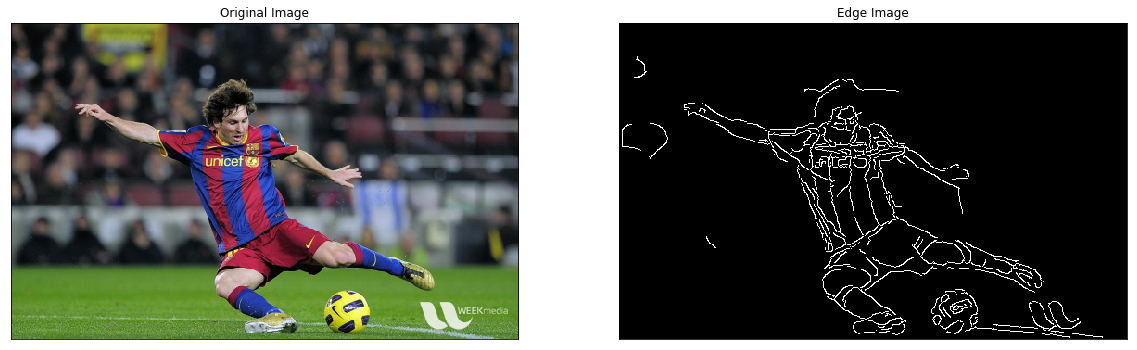

In [23]:
edges = cv2.GaussianBlur(messi,(5,5),10)
# edges = messi
edges = cv2.Canny(edges,100,200)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(messi_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Feature Detection

### SIFT Features 

SIFT (Scale Invariant Feature Transform) gives scale-invariant, rotation-invariant features.

Steps of SIFT Algorithm:
1. Constructing a scale space 
2. LoG Approximation 
3. Finding keypoints 
4. Assigning an orientation to the keypoints 
5. Generate SIFT features 

Number of keypoints detected: 1252
Descriptors shape: (1252, 128)
Descriptor: [[  16.    3.    0. ...,    7.    2.   16.]
 [  27.   62.   63. ...,    0.    0.    0.]
 [   1.    1.    0. ...,   18.   29.   11.]
 ..., 
 [   0.    0.    0. ...,    0.    0.   16.]
 [   1.    0.    1. ...,    6.   46.  107.]
 [  29.    0.    0. ...,    0.    0.    0.]]


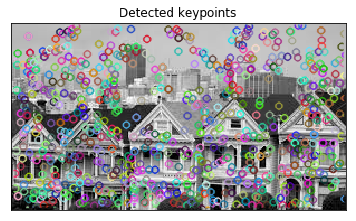

In [24]:
img = cv2.imread(os.path.join(image_path,'rowhouse.jpg'))

gray= cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(gray,None)

cv2.drawKeypoints(img,kp,img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(15,15))
plt.imshow(img_rgb)
plt.title('Detected keypoints'), plt.xticks([]), plt.yticks([])


print('Number of keypoints detected:',len(kp))
print('Descriptors shape:',desc.shape)
print('Descriptor:',desc)

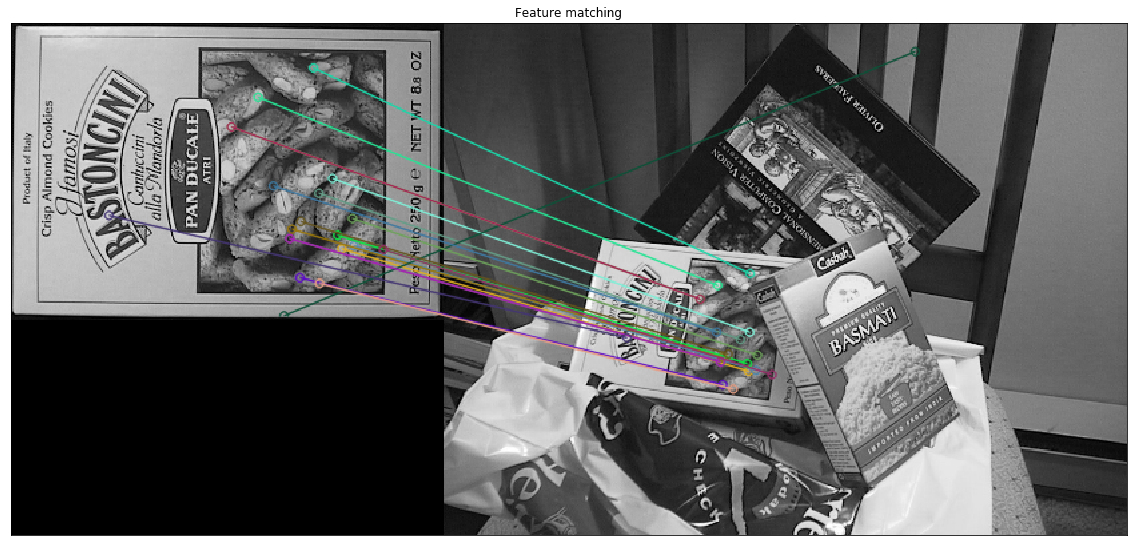

In [25]:
img1 = cv2.imread(os.path.join(image_path,'box.png'))          # queryImage
img2 = cv2.imread(os.path.join(image_path,'box_in_scene.png')) # trainImage

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1)
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)
img3 = np.zeros(0)

img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],img3, flags=2)
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title('Feature matching'), plt.xticks([]), plt.yticks([])

plt.show()

'3.3.1'